In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [4]:
bank = pd.read_csv('BankChurners.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [11]:
fitur_loc = ['Dependent_count', 'Credit_Limit','Total_Revolving_Bal','Card_Category']
fitur = ['Dependent_count', 'Credit_Limit','Total_Revolving_Bal']
bank = bank.loc[:100,(fitur_loc)]
X = bank[fitur]
y = bank.Card_Category
display(bank)

,Dependent_count,Credit_Limit,Total_Revolving_Bal,Card_Category
0,3,12691.0,777,Blue
1,5,8256.0,864,Blue
2,3,3418.0,0,Blue
3,4,3313.0,2517,Blue
4,3,4716.0,0,Blue
...,...,...,...,...
96,3,3454.0,1200,Blue
97,3,3789.0,1706,Blue
98,3,9689.0,2250,Blue
99,2,5449.0,1628,Blue


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 0.47443061  0.16841142 -0.79409625]
 [ 2.07168034 -0.27382018 -0.68036734]
 [ 0.47443061 -0.75623651 -1.80981309]
 [ 1.27305548 -0.76670648  1.48048201]
 [ 0.47443061 -0.62680774 -1.80981309]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 0.47443061 -0.24280912  0.40593987]
 [ 1.27305548  2.02418869  0.74320492]
 [-0.32419425 -0.92884145 -0.36271072]
 [-1.12281912 -0.95364032 -0.75357215]
 [-1.12281912 -0.07848045 -0.48951192]]
y Training: 80    Blue
91    Blue
68    Blue
51    Blue
27    Blue
Name: Card_Category, dtype: object


In [14]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [15]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue'
 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue'
 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue' 'Blue'
 'Blue']


Akurasi : 93.54838709677419 %


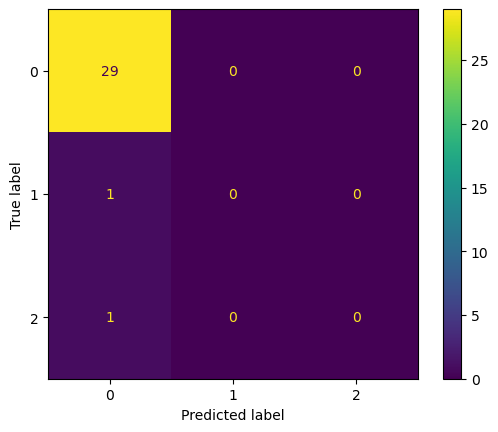

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))